# Linear Regression Homework
- The dataset you are working is Boston Housing Price
- The Boston_Housing_Prices dataset is a famous dataset usually used for learning or benchmarking regression techniques. This dataset contains 14 variables, one of which (MEDV, median value of home) we'll use as the target. 

### For this assignment, your task is to:
1. Read in the dataset using sklearn's load_boston() function (found in sklearn.datasets) 
1. Perform some basic exploratory data analysis to get a feel for the data. Graph some stuff! 
1. Create a correlation heatmap to check to see how highly correlated our predictor variables (features) are (Remember, if our predictors are highly correlated, this is bad.)
1. Train the model based on the train set. Use 75 percent of the data for train part. Use 25 percent of the data for test part.
	- Hint: `from sklearn.model_selection import train_test_split`
	- Hint: `X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)`
1. -Make predictions on your test set (X_test) and see how well it compares to the actual targets (y_test) from the test set.
1. Compute, Mean-Square-Error (MSE) and R Squared score of your Model 
	- Hint: `from sklearn.metrics import r2_score`
	- Hint: `from sklearn.metrics import mean_squared_error`

### Apply data normalization (Scaling) to improve the prediction result

- Use StandardScaler and then train your Linear Regression Model. Comapre the R Square score with previous one you got
- Use MinMaxScaler and then train your Linear Regression Model. Comapre the R Square score with previous one you got
- Watch this video: https://www.youtube.com/watch?v=YKP31T5LIXQ

---

## Step 1: Read the Dataset
Read in the dataset using sklearn's load_boston() function (found in sklearn.datasets)

In [5]:
import pandas
import math
import seaborn

# load_boston() has all the data we need for this project
from sklearn.datasets import load_boston

# preprocessing is used for normalization in step 1.5
from sklearn import preprocessing

# train_test_split is used for data splitting in step 4
from sklearn.model_selection import train_test_split

In [6]:
# get the dataset
boston = load_boston()
# create the dataframe
data = pandas.DataFrame(boston.data)

# check out the dataframe
data.head()

0     1     2    3      4      5     6       7    8      9     10  \
0  0.00632  18.0  2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0  15.3   
1  0.02731   0.0  7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0  17.8   
2  0.02729   0.0  7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0  17.8   
3  0.03237   0.0  2.18  0.0  0.458  6.998  45.8  6.0622  3.0  222.0  18.7   
4  0.06905   0.0  2.18  0.0  0.458  7.147  54.2  6.0622  3.0  222.0  18.7   

       11    12  
0  396.90  4.98  
1  396.90  9.14  
2  392.83  4.03  
3  394.63  2.94  
4  396.90  5.33

In [7]:
# add default names from dataset
data.columns = boston.feature_names
# add price data
data['PRICE'] = boston.target
print(data.columns)

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE'],
      dtype='object')


At this point I was curious about the naming convention used here. Knowing the boston housing dataset is a popular one, I did some preliminary research. I Googled it and happened upon [this site](https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html). With this information I know what each of these headers mean:
1. `CRIM` - per capita crime rate by town
1. `ZN` - proportion of residential land zoned for lots over 25,000 sq.ft.
1. `INDUS` - proportion of non-retail business acres per town.
1. `CHAS` - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
1. `NOX` - nitric oxides concentration (parts per 10 million)
1. `RM` - average number of rooms per dwelling
1. `AGE` - proportion of owner-occupied units built prior to 1940
1. `DIS` - weighted distances to five Boston employment centres
1. `RAD` - index of accessibility to radial highways
1. `TAX` - full-value property-tax rate per &dollar;10,000
1. `PTRATIO` - pupil-teacher ratio by town
1. `B` - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
1. `LSTAT` - % lower status of the population
1. `MEDV` - Median value of owner-occupied homes in &dollar;1,000's

In [8]:
# add price data
data['PRICE'] = boston.target
# view sample of current table
data.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  PRICE  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2

### Step 1½: Normalize the Dataset
Normalization is an important process in data science. In order to compare two datasets with different units, there has to be some sort of process to equalize its curve centered on an agreeable point.

## Step 2: Explore the Dataset
Perform some basic exploratory data analysis to get a feel for the data. Graph some stuff! 

In [9]:
seaborn.set(style="whitegrid")

## Step 3: Create Correlation Heatmap
Create a correlation heatmap to check to see how highly correlated our predictor variables (features) are. Remember, if our predictors are highly correlated, this is bad. Also, check out [this resource](http://www.sthda.com/english/wiki/ggplot2-quick-correlation-matrix-heatmap-r-software-and-data-visualization).

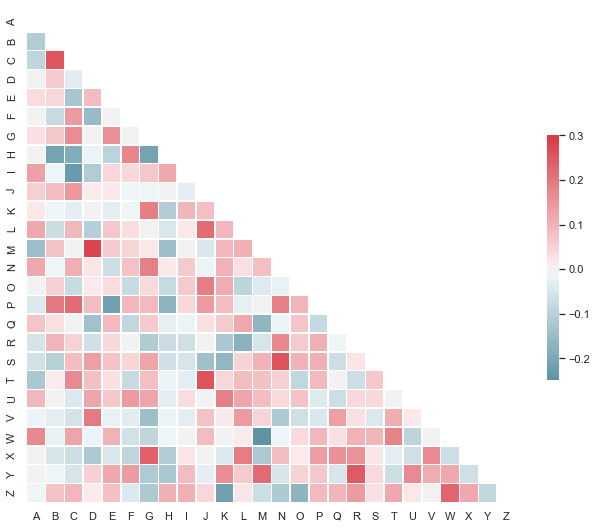

In [12]:
# == NOTE ==
# sample code from https://seaborn.pydata.org/examples/many_pairwise_correlations.html

from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")

# Generate a large random dataset
rs = np.random.RandomState(33)
d = pd.DataFrame(data=rs.normal(size=(100, 26)),
                 columns=list(ascii_letters[26:]))

# Compute the correlation matrix
corr = d.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

## Step 4: Model Training
Train the model based on the train set. Use 75 percent of the data for train part. Use 25 percent of the data for test part.
- Hint: `from sklearn.model_selection import train_test_split`
- Hint: `X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)`

In [ ]:
# set up standard naming convention for training:
X = data[boston.feature_names]
Y = data['PRICE']

# `test_ratio` is explicitly stated in the assignment details.
# it is the amount of testing data vs training data we have.
test_ratio = 0.25

In [ ]:
# `test_group` is the actual number of test data rows.
test_group = math.ceil(test_ratio * len(X))

# randomly pick `test_size` number of data for testing.
X_test_check = X[:test_group]
Y_test_check = Y[:test_group]
# leave the rest for training.
X_train_check = X[test_group:]
Y_train_check = Y[test_group:]

In [ ]:
# == NOTE ==
# all this stuff done in the above cell can be distilled to this:
X_train, X_test, Y_train, Y_test = train_test_split(
	X, Y, test_size=test_ratio, random_state=0)

In [ ]:
# we can ensure all this is equivalent by comparing some items:
print(len(X_test_check), len(X_test))
print(len(Y_test_check), len(Y_test))
print(len(X_train_check), len(X_train))
print(len(Y_train_check), len(Y_train))

# assertion statements will help check for issues later:
assert(len(X_train) == len(Y_train) == len(X_train_check) == len(Y_train_check))
assert(len(X_test) == len(Y_test) == len(X_test_check) == len(Y_test_check))

In [ ]:
# symentic (but otherwise pointless) cleanup
del X_test_check
del Y_test_check
del X_train_check
del Y_train_check

## Step 5: Model Predictions
Make predictions on your test set (X_test) and see how well it compares to the actual targets (y_test) from the test set.

## Step 6: Compute Error
Compute, Mean-Square-Error (MSE) and R Squared score of your Model 
- Hint: `from sklearn.metrics import r2_score`
- Hint: `from sklearn.metrics import mean_squared_error`